# IDTA Coursework 1: Task 2 - Classification
## Predicting Depression Using 3 Algorithms
- Decision Tree
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)

### Import Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### Load and Prepare Data

In [11]:
# Load dataset
df = pd.read_csv('Depression Professional Dataset.csv')
print(f"Dataset loaded: {df.shape}")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Dataset loaded: (2054, 11)

Categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
Numerical columns: ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']


### Data Preparation for Classification

In [12]:
# Create a copy for classification
df_class = df.copy()

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    if col != 'Depression':  # Don't encode target yet
        le = LabelEncoder()
        df_class[col] = le.fit_transform(df_class[col])
        le_dict[col] = le
        print(f"Encoded {col}: {dict(enumerate(le.classes_))}")

# Encode target variable
le_target = LabelEncoder()
df_class['Depression'] = le_target.fit_transform(df_class['Depression'])
print(f"\nEncoded Depression: {dict(enumerate(le_target.classes_))}")

# Prepare features and target
X_class = df_class.drop('Depression', axis=1)
y_class = df_class['Depression']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Feature count: {X_class.shape[1]}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())

Encoded Gender: {0: 'Female', 1: 'Male'}
Encoded Sleep Duration: {0: '5-6 hours', 1: '7-8 hours', 2: 'Less than 5 hours', 3: 'More than 8 hours'}
Encoded Dietary Habits: {0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy'}
Encoded Have you ever had suicidal thoughts ?: {0: 'No', 1: 'Yes'}
Encoded Family History of Mental Illness: {0: 'No', 1: 'Yes'}

Encoded Depression: {0: 'No', 1: 'Yes'}

Training set size: 1643
Test set size: 411
Feature count: 10

Class distribution in training set:
Depression
0    1481
1     162
Name: count, dtype: int64


## Algorithm 1: Decision Tree Classifier

In [13]:
print("="*80)
print("ALGORITHM 1: DECISION TREE CLASSIFIER")
print("="*80)

# Train Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=5)
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)

# Calculate metrics
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt, zero_division=0)
dt_rec = recall_score(y_test, y_pred_dt, zero_division=0)
dt_f1 = f1_score(y_test, y_pred_dt, zero_division=0)

print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {dt_acc:.4f}")
print(f"  Precision: {dt_prec:.4f}")
print(f"  Recall:    {dt_rec:.4f}")
print(f"  F1-Score:  {dt_f1:.4f}")

print(f"\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Depression', 'Depression']))

ALGORITHM 1: DECISION TREE CLASSIFIER

Performance Metrics:
  Accuracy:  0.9392
  Precision: 0.7353
  Recall:    0.6098
  F1-Score:  0.6667

Confusion Matrix:
[[361   9]
 [ 16  25]]

Classification Report:
               precision    recall  f1-score   support

No Depression       0.96      0.98      0.97       370
   Depression       0.74      0.61      0.67        41

     accuracy                           0.94       411
    macro avg       0.85      0.79      0.82       411
 weighted avg       0.94      0.94      0.94       411



## Algorithm 2: K-Nearest Neighbors (KNN)

In [14]:
print("="*80)
print("ALGORITHM 2: K-NEAREST NEIGHBORS (KNN)")
print("="*80)

# Train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)

# Calculate metrics
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_prec = precision_score(y_test, y_pred_knn, zero_division=0)
knn_rec = recall_score(y_test, y_pred_knn, zero_division=0)
knn_f1 = f1_score(y_test, y_pred_knn, zero_division=0)

print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {knn_acc:.4f}")
print(f"  Precision: {knn_prec:.4f}")
print(f"  Recall:    {knn_rec:.4f}")
print(f"  F1-Score:  {knn_f1:.4f}")

print(f"\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['No Depression', 'Depression']))

ALGORITHM 2: K-NEAREST NEIGHBORS (KNN)

Performance Metrics:
  Accuracy:  0.9416
  Precision: 0.9048
  Recall:    0.4634
  F1-Score:  0.6129

Confusion Matrix:
[[368   2]
 [ 22  19]]

Classification Report:
               precision    recall  f1-score   support

No Depression       0.94      0.99      0.97       370
   Depression       0.90      0.46      0.61        41

     accuracy                           0.94       411
    macro avg       0.92      0.73      0.79       411
 weighted avg       0.94      0.94      0.93       411



## Algorithm 3: Support Vector Machine (SVM)

In [15]:
print("="*80)
print("ALGORITHM 3: SUPPORT VECTOR MACHINE (SVM)")
print("="*80)

# Train SVM
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate metrics
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_prec = precision_score(y_test, y_pred_svm, zero_division=0)
svm_rec = recall_score(y_test, y_pred_svm, zero_division=0)
svm_f1 = f1_score(y_test, y_pred_svm, zero_division=0)

print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {svm_acc:.4f}")
print(f"  Precision: {svm_prec:.4f}")
print(f"  Recall:    {svm_rec:.4f}")
print(f"  F1-Score:  {svm_f1:.4f}")

print(f"\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['No Depression', 'Depression']))

ALGORITHM 3: SUPPORT VECTOR MACHINE (SVM)

Performance Metrics:
  Accuracy:  0.9684
  Precision: 0.9375
  Recall:    0.7317
  F1-Score:  0.8219

Confusion Matrix:
[[368   2]
 [ 11  30]]

Classification Report:
               precision    recall  f1-score   support

No Depression       0.97      0.99      0.98       370
   Depression       0.94      0.73      0.82        41

     accuracy                           0.97       411
    macro avg       0.95      0.86      0.90       411
 weighted avg       0.97      0.97      0.97       411


Performance Metrics:
  Accuracy:  0.9684
  Precision: 0.9375
  Recall:    0.7317
  F1-Score:  0.8219

Confusion Matrix:
[[368   2]
 [ 11  30]]

Classification Report:
               precision    recall  f1-score   support

No Depression       0.97      0.99      0.98       370
   Depression       0.94      0.73      0.82        41

     accuracy                           0.97       411
    macro avg       0.95      0.86      0.90       411
 weighted av

## Classification Results Comparison

In [16]:
print("="*80)
print("CLASSIFICATION RESULTS COMPARISON")
print("="*80)

# Create comparison table
comparison = pd.DataFrame({
    'Algorithm': ['Decision Tree', 'KNN', 'SVM'],
    'Accuracy': [dt_acc, knn_acc, svm_acc],
    'Precision': [dt_prec, knn_prec, svm_prec],
    'Recall': [dt_rec, knn_rec, svm_rec],
    'F1-Score': [dt_f1, knn_f1, svm_f1]
})

print("\n", comparison.to_string(index=False))
comparison.to_csv('output_files/Task2_Classification_Results.csv', index=False)
print("\n✓ Saved to: output_files/Task2_Classification_Results.csv")

# Find best algorithm
best_idx = comparison['Accuracy'].idxmax()
best_algo = comparison.loc[best_idx, 'Algorithm']
best_acc = comparison.loc[best_idx, 'Accuracy']
print(f"\nBest Algorithm: {best_algo} (Accuracy: {best_acc:.4f})")

CLASSIFICATION RESULTS COMPARISON

     Algorithm  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.939173   0.735294 0.609756  0.666667
          KNN  0.941606   0.904762 0.463415  0.612903
          SVM  0.968370   0.937500 0.731707  0.821918

✓ Saved to: output_files/Task2_Classification_Results.csv

Best Algorithm: SVM (Accuracy: 0.9684)

✓ Saved to: output_files/Task2_Classification_Results.csv

Best Algorithm: SVM (Accuracy: 0.9684)


## Visualize Confusion Matrices

✓ Saved: output_files/Task2_Confusion_Matrices.png


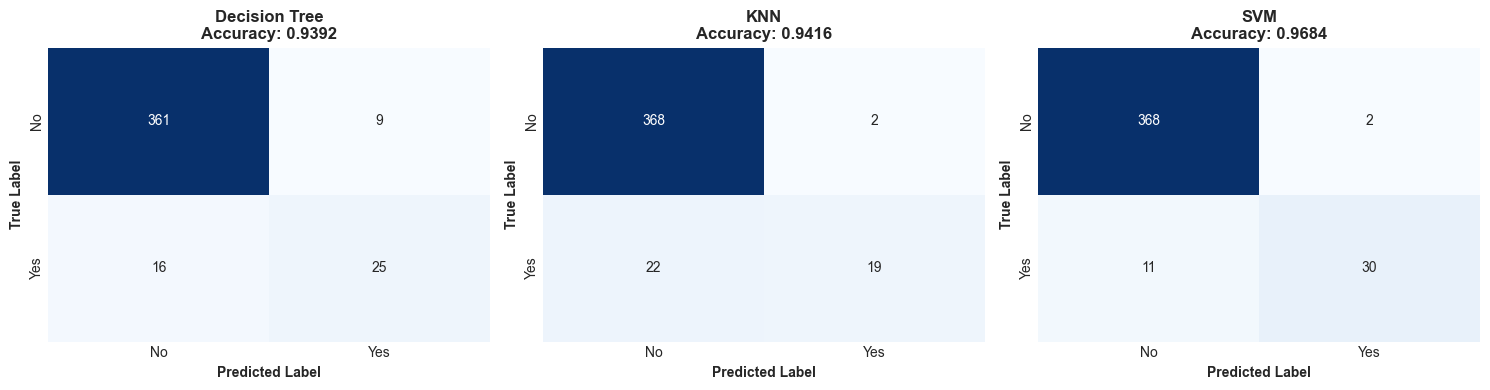


TASK 2: CLASSIFICATION COMPLETED


In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

algorithms = ['Decision Tree', 'KNN', 'SVM']
cms = [cm_dt, cm_knn, cm_svm]
accs = [dt_acc, knn_acc, svm_acc]

for idx, (ax, algo, cm, acc) in enumerate(zip(axes, algorithms, cms, accs)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
               xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    ax.set_title(f'{algo}\nAccuracy: {acc:.4f}', fontweight='bold', fontsize=12)
    ax.set_ylabel('True Label', fontweight='bold')
    ax.set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('output_files/Task2_Confusion_Matrices.png', dpi=300, bbox_inches='tight')
print("✓ Saved: output_files/Task2_Confusion_Matrices.png")
plt.show()

print("\n" + "="*80)
print("TASK 2: CLASSIFICATION COMPLETED")
print("="*80)